# Exploratory Data Analysis

In [1]:
import pandas as pd
from utils import load_config

config = load_config('config.yml')
path_data = config['dataset']['raw']

df = pd.read_csv(path_data)
print(f'{df.shape = }')
df.head()

df.shape = (9996, 13)


,fullVisitorId,channelGrouping,weekend_prop,hour,sessionId,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,totals.hits,totals.pageviews,bounce_prop,trafficSource.medium
0,213131142648941,Direct,0.000000,22.0,1,Chrome,desktop,0.0,Macintosh,14.0,13.0,0.0,(none)
1,435324061339869,Referral,0.666667,21.0,3,Chrome,desktop,0.0,Macintosh,14.0,11.0,0.0,referral
2,562678147042735,Organic Search,0.000000,14.0,2,Chrome,desktop,0.0,Macintosh,12.5,10.5,0.0,organic
3,585708896049892,Referral,0.000000,20.0,1,Chrome,desktop,0.0,Linux,22.0,20.0,0.0,referral
4,670722016498267,Referral,0.000000,17.0,2,Chrome,desktop,0.0,Linux,9.5,9.5,0.0,referral


El conjunto de datos original está compuesto por una variedad de características que proporcionan información detallada sobre las visitas de los usuarios a un sitio web. Estas características permiten analizar y entender el comportamiento del usuario, los canales de adquisición de tráfico y las interacciones dentro del sitio. A continuación, se describen las principales características del dataset:

- fullVisitorId: Identificador único del visitante. 
-  channelGrouping: Canal de agrupación (ej. orgánico, pagado, etc.). 
-  weekend_prop: Proporción de visitas durante el fin de semana. 
-  hour: Hora de la visita. 
-  sessionId: Identificador de la sesión. 
-  device.browser: Navegador del dispositivo. 
- device.deviceCategory: Categoría del dispositivo (desktop, móvil, tablet). 
- device.isMobile: Indica si el dispositivo es móvil. 
- device.operatingSystem: Sistema operativo del dispositivo. 
- totals.hits: Total de hits (interacciones) en la sesión. 
- totals.pageviews: Total de páginas vistas en la sesión. 
- bounce_prop: Proporción de rebotes. 
- trafficSource.medium: Medio de tráfico (orgánico, referenciado, etc.)

## Verificación de las variables

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fullVisitorId           9996 non-null   uint64 
 1   channelGrouping         9996 non-null   object 
 2   weekend_prop            9996 non-null   float64
 3   hour                    9996 non-null   float64
 4   sessionId               9996 non-null   int64  
 5   device.browser          9996 non-null   object 
 6   device.deviceCategory   9996 non-null   object 
 7   device.isMobile         9996 non-null   float64
 8   device.operatingSystem  9996 non-null   object 
 9   totals.hits             9996 non-null   float64
 10  totals.pageviews        9996 non-null   float64
 11  bounce_prop             9996 non-null   float64
 12  trafficSource.medium    9996 non-null   object 
dtypes: float64(6), int64(1), object(5), uint64(1)
memory usage: 1015.3+ KB


In [3]:
categoricas = ['fullVisitorId', 'channelGrouping', 'device.browser', 'device.deviceCategory',
            'device.operatingSystem', 'trafficSource.medium']

numericas = ['fullVisitorId', 'weekend_prop', 'hour',  
            'totals.hits', 'totals.pageviews',
            'bounce_prop']

### Variables Numericas

In [4]:
df_n = df[numericas]
print(df_n.isna().sum())
df_n.describe()

fullVisitorId       0
weekend_prop        0
hour                0
totals.hits         0
totals.pageviews    0
bounce_prop         0
dtype: int64


,fullVisitorId,weekend_prop,hour,totals.hits,totals.pageviews,bounce_prop
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.478856e+18,0.147011,14.449030,22.177771,17.530312,0.082718
std,3.066153e+18,0.296219,6.261204,21.916773,16.259149,0.162298
min,2.131311e+14,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.577139e+18,0.000000,11.000000,9.000000,8.000000,0.000000
50%,4.346933e+18,0.000000,16.500000,17.000000,14.000000,0.000000
75%,7.132082e+18,0.126359,19.000000,28.000000,22.500000,0.083333
max,9.998996e+18,1.000000,23.000000,500.000000,466.000000,0.925373


La variable de la hora será transformada de manera cíclica. Esta técnica asegurará que las horas del día, desde la hora 0 hasta la hora 23, estén representadas de forma continua y cercana en el espacio transformado.

Después de transformar la variable de la hora de manera cíclica, se aplica un proceso de estandarización a todos los datos numéricos. Esto implica ajustar los valores para que tengan una media de 0 y una desviación estándar de 1. La estandarización es importante porque ayuda a comparar y interpretar las diferentes variables numéricas en una escala común, facilitando así el análisis y el modelado de datos.

In [5]:
# Cambio de la hora
import numpy as np

df_nn = df_n.copy()
df_nn.drop('fullVisitorId', axis=1)
df_nn['hour_sin'] = np.sin(2 * np.pi * df_nn['hour'] / 24)
df_nn = df_nn.drop('hour', axis=1)
df_nn

,fullVisitorId,weekend_prop,totals.hits,totals.pageviews,bounce_prop,hour_sin
0,213131142648941,0.000000,14.0,13.0,0.0,-0.500000
1,435324061339869,0.666667,14.0,11.0,0.0,-0.707107
2,562678147042735,0.000000,12.5,10.5,0.0,-0.500000
3,585708896049892,0.000000,22.0,20.0,0.0,-0.866025
4,670722016498267,0.000000,9.5,9.5,0.0,-0.965926
...,...,...,...,...,...,...
9991,9991633376050115277,0.000000,17.0,16.0,0.0,0.000000
9992,9994767073213036303,0.000000,42.0,30.0,0.0,-0.866025
9993,9997409246962677759,0.000000,86.0,65.0,0.0,0.500000
9994,9998597322098588317,0.000000,37.0,33.0,0.0,-0.707107


In [6]:
# Estandarización

from sklearn.preprocessing import StandardScaler

columns = df_nn.columns[1:]
scaler = StandardScaler()
df_nn[columns] = scaler.fit_transform(df_nn[columns])
df_nn

,fullVisitorId,weekend_prop,totals.hits,totals.pageviews,bounce_prop,hour_sin
0,213131142648941,-0.496316,-0.373147,-0.278646,-0.509694,-0.124504
1,435324061339869,1.754384,-0.373147,-0.401659,-0.509694,-0.437382
2,562678147042735,-0.496316,-0.441591,-0.432413,-0.509694,-0.124504
3,585708896049892,-0.496316,-0.008112,0.151903,-0.509694,-0.677462
4,670722016498267,-0.496316,-0.578480,-0.493920,-0.509694,-0.828383
...,...,...,...,...,...,...
9991,9991633376050115277,-0.496316,-0.236259,-0.094125,-0.509694,0.630852
9992,9994767073213036303,-0.496316,0.904477,0.766972,-0.509694,-0.677462
9993,9997409246962677759,-0.496316,2.912172,2.919714,-0.509694,1.386207
9994,9998597322098588317,-0.496316,0.676330,0.951493,-0.509694,-0.437382


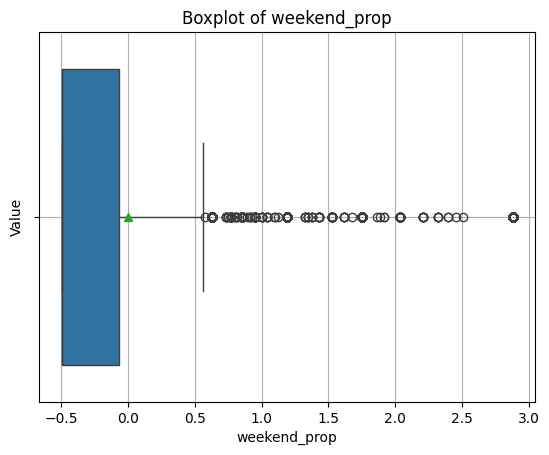

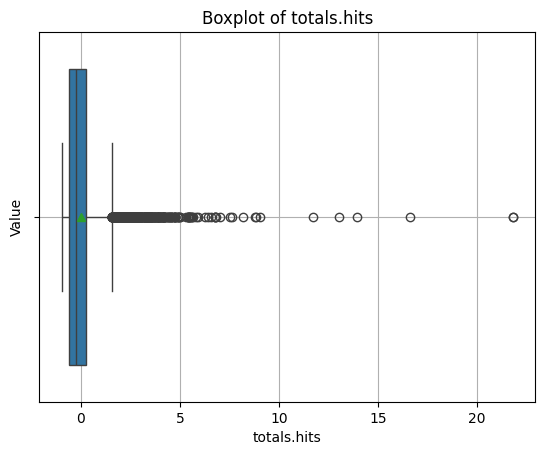

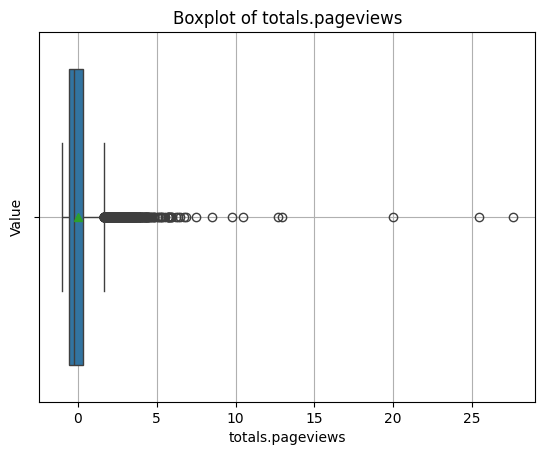

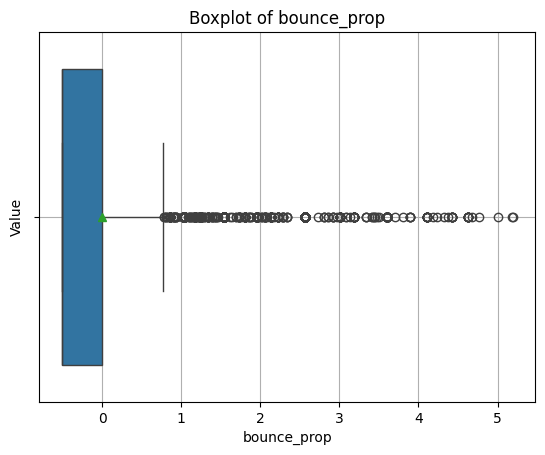

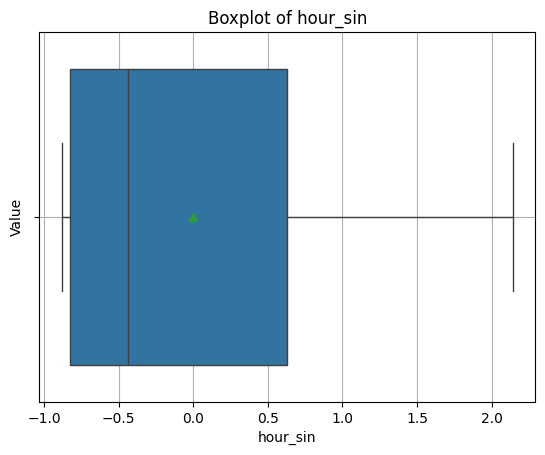

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot(df):
    for col in columns:
        sns.boxplot(
            x=col,
            showmeans=True,
            data=df,
        )

        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.ylabel("Value")
        plt.grid(True) 
        plt.show()

plot_boxplot(df_nn)


Con los boxplots se pueden identificar outliers, los cuales deben ser tratados antes de proceder con la segmentación de los clientes.

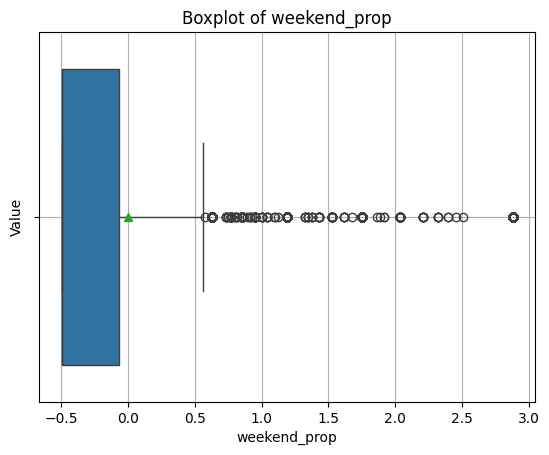

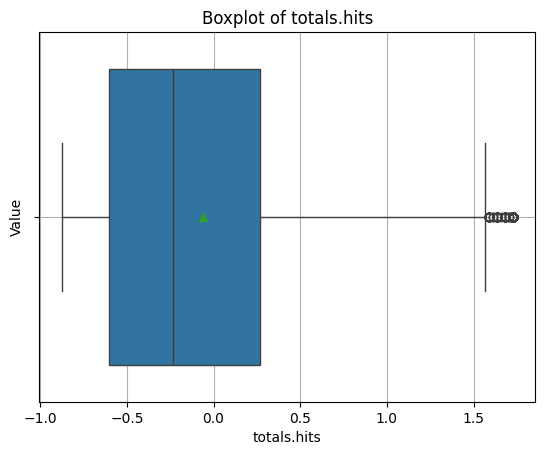

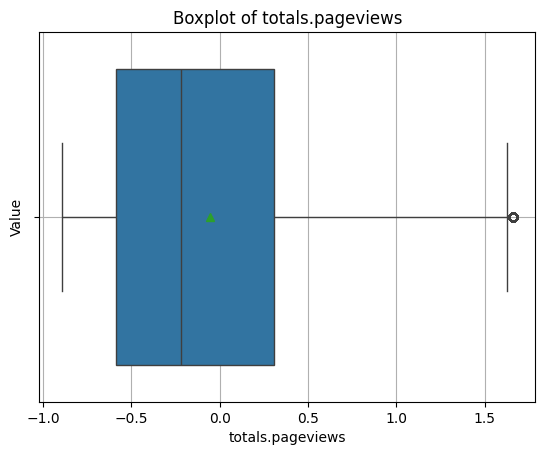

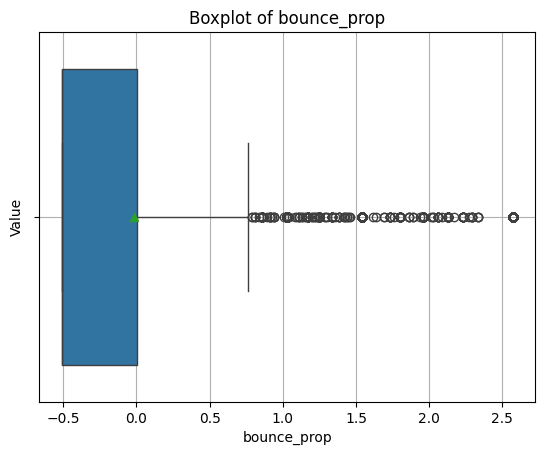

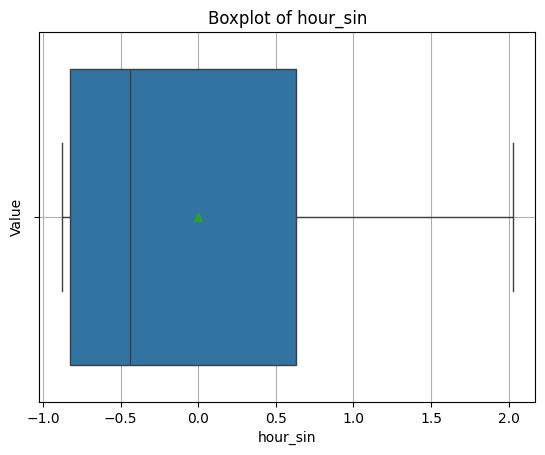

In [8]:
from scipy.stats.mstats import winsorize

def identify_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return  df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers = {col: identify_outliers(df_nn, col) for col in df_nn.columns[1:]}

df_n_transformed = df_nn.copy()
for col in df_nn.columns:
    df_n_transformed[col] = winsorize(df_nn[col], limits=[0.05, 0.05])

plot_boxplot(df_n_transformed)

In [9]:
df_n_transformed['fullVisitorId'] = df_n['fullVisitorId']
df_n_transformed

,fullVisitorId,weekend_prop,totals.hits,totals.pageviews,bounce_prop,hour_sin
0,213131142648941,-0.496316,-0.373147,-0.278646,-0.509694,-0.124504
1,435324061339869,1.754384,-0.373147,-0.401659,-0.509694,-0.437382
2,562678147042735,-0.496316,-0.441591,-0.432413,-0.509694,-0.124504
3,585708896049892,-0.496316,-0.008112,0.151903,-0.509694,-0.677462
4,670722016498267,-0.496316,-0.578480,-0.493920,-0.509694,-0.828383
...,...,...,...,...,...,...
9991,9991633376050115277,-0.496316,-0.236259,-0.094125,-0.509694,0.630852
9992,9994767073213036303,-0.496316,0.904477,0.766972,-0.509694,-0.677462
9993,9997409246962677759,-0.496316,1.725807,1.658822,-0.509694,1.386207
9994,9998597322098588317,-0.496316,0.676330,0.951493,-0.509694,-0.437382


### Variables Categoricas

In [10]:
df_c = df[categoricas]
df_cc = df_c.copy()
print(df_cc.shape)
df_cc.sample(5)

(9996, 6)


,fullVisitorId,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,trafficSource.medium
2542,1639072713254976825,Referral,Chrome,desktop,Linux,referral
3078,2220891106353085250,Organic Search,Chrome,desktop,Windows,organic
901,400913504715815672,Organic Search,Chrome,mobile,Android,organic
3872,3112141012835314636,Direct,Chrome,desktop,Macintosh,(none)
4131,3430477104062531238,Direct,Chrome,desktop,Windows,(none)


In [11]:
unique_values = {column: df_cc[column].unique() for column in df_cc.columns[1:]}

for key, values in unique_values.items():
    print(f'{key}: {values}')

channelGrouping: ['Direct' 'Referral' 'Organic Search' 'Display' 'Paid Search' 'Social'
 'Affiliates' '(Other)']
device.browser: ['Chrome' 'Safari' 'Firefox' 'Edge' 'Internet Explorer' 'Opera'
 'Safari (in-app)' 'Amazon Silk' 'Android Webview']
device.deviceCategory: ['desktop' 'mobile' 'tablet']
device.operatingSystem: ['Macintosh' 'Linux' 'Windows' 'iOS' 'Chrome OS' 'Android' 'Windows Phone']
trafficSource.medium: ['(none)' 'referral' 'organic' 'cpm' 'cpc' 'affiliate' '(not set)']


In [12]:
category_counts = {col: df_cc[col].value_counts() for col in df_cc.columns[1:]}

for _, counts in category_counts.items():
    print(counts)
    print()

channelGrouping
Referral          4286
Organic Search    3233
Direct            1850
Paid Search        400
Display            141
Social              74
Affiliates          11
(Other)              1
Name: count, dtype: int64

device.browser
Chrome               8937
Safari                727
Firefox               161
Internet Explorer      95
Edge                   52
Safari (in-app)        12
Android Webview         6
Opera                   5
Amazon Silk             1
Name: count, dtype: int64

device.deviceCategory
desktop    9027
mobile      809
tablet      160
Name: count, dtype: int64

device.operatingSystem
Macintosh        5551
Windows          1991
Chrome OS         768
Linux             732
iOS               519
Android           434
Windows Phone       1
Name: count, dtype: int64

trafficSource.medium
referral     4365
organic      3158
(none)       1848
cpc           475
cpm           138
affiliate      11
(not set)       1
Name: count, dtype: int64



In [13]:
df_cc = df_cc[df_cc['channelGrouping'] != '(Other)'] 

replace_dict = {'Android Webview': 'Other', 'Opera': 'Other'}
df_cc['device.browser'] = df_cc['device.browser'].replace(replace_dict)
df_cc = df_cc[df_cc['device.browser'] != 'Amazon Silk']

df_cc = df_cc[df_cc['device.operatingSystem'] != 'Windows Phone']

eplace_dict = {'(not set)': '(none)'}
df_cc['trafficSource.medium'] = df_cc['trafficSource.medium'].replace(replace_dict)
df_cc

,fullVisitorId,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,trafficSource.medium
0,213131142648941,Direct,Chrome,desktop,Macintosh,(none)
1,435324061339869,Referral,Chrome,desktop,Macintosh,referral
2,562678147042735,Organic Search,Chrome,desktop,Macintosh,organic
3,585708896049892,Referral,Chrome,desktop,Linux,referral
4,670722016498267,Referral,Chrome,desktop,Linux,referral
...,...,...,...,...,...,...
9991,9991633376050115277,Social,Chrome,desktop,Linux,referral
9992,9994767073213036303,Organic Search,Chrome,desktop,Windows,organic
9993,9997409246962677759,Referral,Chrome,desktop,Macintosh,referral
9994,9998597322098588317,Direct,Chrome,desktop,Macintosh,(none)


In [14]:
category_counts = {col: df_cc[col].value_counts() for col in df_cc.columns[1:]}

for _, counts in category_counts.items():
    print(counts)
    print()

channelGrouping
Referral          4286
Organic Search    3231
Direct            1850
Paid Search        400
Display            141
Social              74
Affiliates          11
Name: count, dtype: int64

device.browser
Chrome               8936
Safari                726
Firefox               161
Internet Explorer      95
Edge                   52
Safari (in-app)        12
Other                  11
Name: count, dtype: int64

device.deviceCategory
desktop    9027
mobile      807
tablet      159
Name: count, dtype: int64

device.operatingSystem
Macintosh    5551
Windows      1991
Chrome OS     768
Linux         732
iOS           518
Android       433
Name: count, dtype: int64

trafficSource.medium
referral     4365
organic      3156
(none)       1848
cpc           475
cpm           138
affiliate      11
Name: count, dtype: int64



In [15]:
# legacy
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# df_c_encoded = encoder.fit_transform(df_c)
# encoded_columns = encoder.get_feature_names_out(df_c.columns)

# df_encoded_o = pd.DataFrame(df_c_encoded, columns=encoded_columns)
# df_encoded_o

In [16]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=df_cc.columns[1:])
df_encoded_b = encoder.fit_transform(df_cc)
df_encoded_b


,fullVisitorId,channelGrouping_0,channelGrouping_1,channelGrouping_2,device.browser_0,device.browser_1,device.browser_2,device.deviceCategory_0,device.deviceCategory_1,device.operatingSystem_0,device.operatingSystem_1,device.operatingSystem_2,trafficSource.medium_0,trafficSource.medium_1,trafficSource.medium_2
0,213131142648941,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,435324061339869,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,562678147042735,0,1,1,0,0,1,0,1,0,0,1,0,1,1
3,585708896049892,0,1,0,0,0,1,0,1,0,1,0,0,1,0
4,670722016498267,0,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9991633376050115277,1,1,0,0,0,1,0,1,0,1,0,0,1,0
9992,9994767073213036303,0,1,1,0,0,1,0,1,0,1,1,0,1,1
9993,9997409246962677759,0,1,0,0,0,1,0,1,0,0,1,0,1,0
9994,9998597322098588317,0,0,1,0,0,1,0,1,0,0,1,0,0,1


In [18]:
data = pd.merge(df_n_transformed, df_encoded_b, on='fullVisitorId', how='inner')
data.to_csv(config['dataset']['pre_ps'], index=False)
data

,fullVisitorId,weekend_prop,totals.hits,totals.pageviews,bounce_prop,hour_sin,channelGrouping_0,channelGrouping_1,channelGrouping_2,device.browser_0,device.browser_1,device.browser_2,device.deviceCategory_0,device.deviceCategory_1,device.operatingSystem_0,device.operatingSystem_1,device.operatingSystem_2,trafficSource.medium_0,trafficSource.medium_1,trafficSource.medium_2
0,213131142648941,-0.496316,-0.373147,-0.278646,-0.509694,-0.124504,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,435324061339869,1.754384,-0.373147,-0.401659,-0.509694,-0.437382,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,562678147042735,-0.496316,-0.441591,-0.432413,-0.509694,-0.124504,0,1,1,0,0,1,0,1,0,0,1,0,1,1
3,585708896049892,-0.496316,-0.008112,0.151903,-0.509694,-0.677462,0,1,0,0,0,1,0,1,0,1,0,0,1,0
4,670722016498267,-0.496316,-0.578480,-0.493920,-0.509694,-0.828383,0,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9991633376050115277,-0.496316,-0.236259,-0.094125,-0.509694,0.630852,1,1,0,0,0,1,0,1,0,1,0,0,1,0
9989,9994767073213036303,-0.496316,0.904477,0.766972,-0.509694,-0.677462,0,1,1,0,0,1,0,1,0,1,1,0,1,1
9990,9997409246962677759,-0.496316,1.725807,1.658822,-0.509694,1.386207,0,1,0,0,0,1,0,1,0,0,1,0,1,0
9991,9998597322098588317,-0.496316,0.676330,0.951493,-0.509694,-0.437382,0,0,1,0,0,1,0,1,0,0,1,0,0,1


## Observaciones sobre los Datos Post-EDA

1. Estandarización de Datos Numéricos:

    Todos los datos numéricos fueron estandarizados para tener una media de 0 y una desviación estándar de 1. Esta transformación es fundamental para garantizar que las características numéricas contribuyan de manera equitativa durante el entrenamiento de los modelos de machine learning, evitando sesgos hacia aquellas con mayores magnitudes.

2. Transformación Cíclica de la Hora:

    La variable que representa la hora fue transformada para corresponder a una medida cíclica mediante una transformación de seno. Esto es crucial para capturar la naturaleza cíclica del tiempo, evitando problemas en los modelos de machine learning que podrían interpretar la hora de manera lineal y no cíclica.

3. Tratamiento de Outliers:

    Se realizó un tratamiento de outliers utilizando la técnica de Winsorize, con límites inferiores y superiores establecidos en 0.05. Esta técnica fue aplicada para minimizar el impacto de valores extremos sin perder la estructura de los datos, mejorando así la robustez de los modelos a entrenar.

4. Encoding de Variables Categóricas:

    Dada la alta cardinalidad de las variables categóricas, se optó por un encoding binario en lugar de one-hot encoding. El enfoque de one-hot encoding habría incrementado considerablemente la dimensionalidad del problema, lo que podría haber afectado negativamente tanto el rendimiento computacional como la eficacia del modelo. El encoding binario permite representar las categorías de manera eficiente y compacta, manteniendo la integridad de la información.

    Además, se realizaron ajustes adicionales para mejorar la calidad de los datos. Se eliminaron las clases poco representativas, es decir, aquellas categorías que presentaban un único valor en algunos casos. Para mitigar la pérdida de información, se reorganizaron las clases de algunas variables. Por ejemplo, en la variable device.browser, las categorías "opera" y "android" se unieron bajo una nueva categoría denominada "other", con el criterio de asegurar al menos 10 muestras por categoría. Este enfoque garantizó que las categorías fueran significativas, representando al menos el 5% de la muestra total cuando era posible, para optimizar la calidad de los datos sin comprometer la eficiencia del modelo.